# Import Library

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Membaca Data

In [2]:
df_description = pd.read_csv('Data Description.csv')
df = pd.read_csv('CO2 Emissions_Canada.csv')

# Inspeksi Data (Informasi Mengenai Data) dan Visualisasi Data

In [3]:
df_description

,Understanding the Data,Unnamed: 1
0,Model,4WD/4X4 = Four-wheel drive
1,NaN,AWD = All-wheel drive
2,NaN,FFV = Flexible-fuel vehicle
3,NaN,SWB = Short wheelbase
4,NaN,LWB = Long wheelbase
5,NaN,EWB = Extended wheelbase
6,Transmission,A = automatic
7,NaN,AM = automated manual
8,NaN,AS = automatic with select shift
9,NaN,AV = continuously variable


In [4]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df['Transmission Type'] = df['Transmission'].apply(lambda x: x[0])
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission Type
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,A
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,M
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,A
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,A
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,A
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,A
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,A
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,A


# Car Brands

In [7]:
df['Make'].value_counts()

Make
FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64

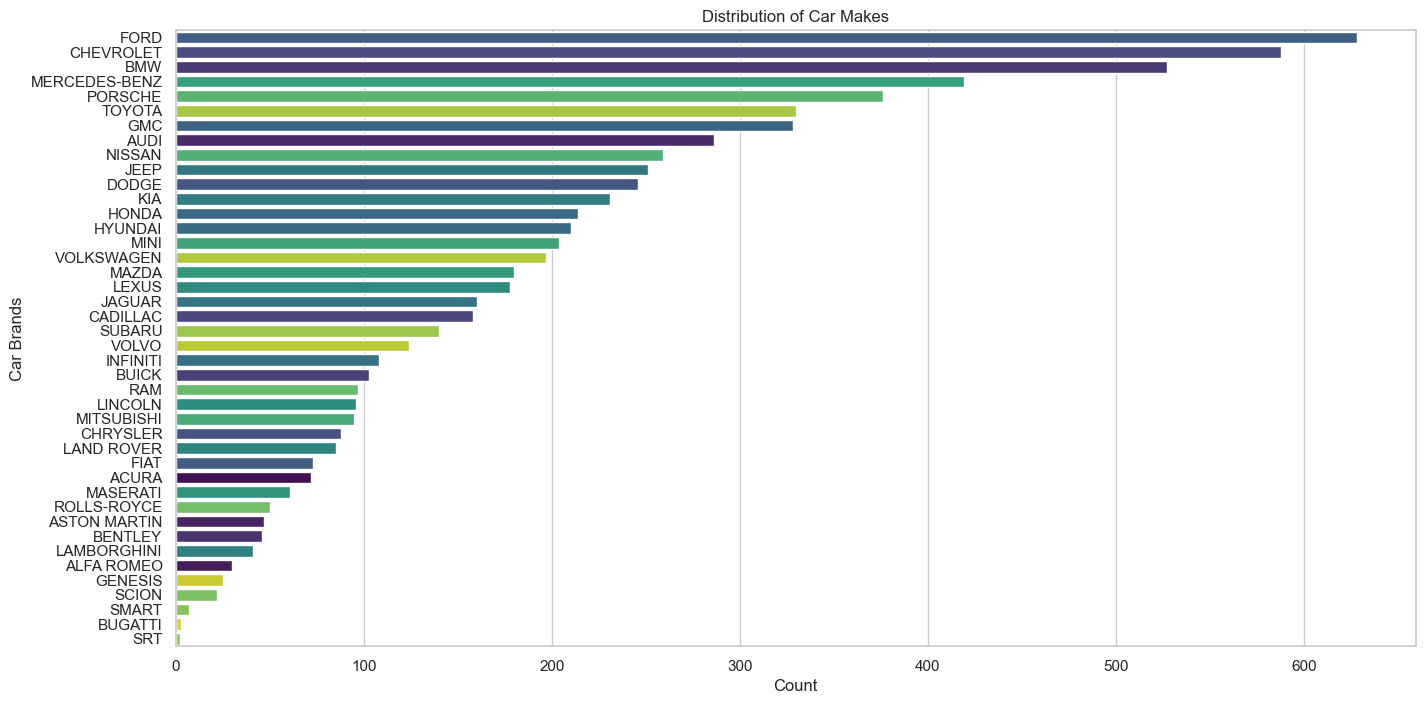

In [8]:
# Bar plot for distribution of car makes
plt.figure(figsize=(16, 8))
sns.set(style='whitegrid')
sns.countplot(y='Make', data=df, palette='viridis', hue='Make', 
order=df['Make'].value_counts().index, legend=False)
plt.title('Distribution of Car Makes')
plt.xlabel('Count')
plt.ylabel('Car Brands')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# Cars Model

In [9]:
df['Model'].value_counts()

Model
F-150 FFV 4X4           32
F-150 FFV               32
MUSTANG                 27
FOCUS FFV               24
SONIC                   20
                        ..
AVENTADOR S ROADSTER     1
HURACAN AWD              1
HURACAN SPYDER AWD       1
LS 500                   1
XC40 T4 AWD              1
Name: count, Length: 2053, dtype: int64

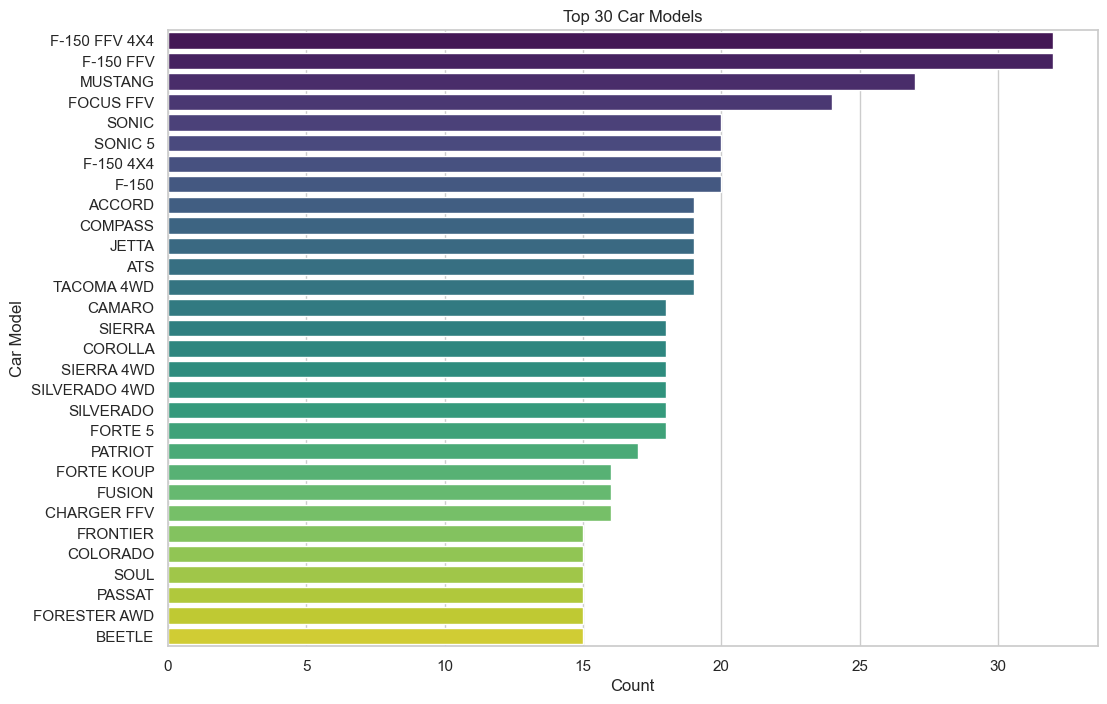

In [10]:
top_n = 30  # Change this to the desired number of top models
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='Model', palette='viridis', hue='Model', 
data=df['Model'].value_counts().reset_index().head(top_n))
plt.title(f'Top {top_n} Car Models')
plt.xlabel('Count')
plt.ylabel('Car Model')
plt.show()

# Transmission

In [11]:
df['Transmission'].value_counts()

Transmission
AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: count, dtype: int64

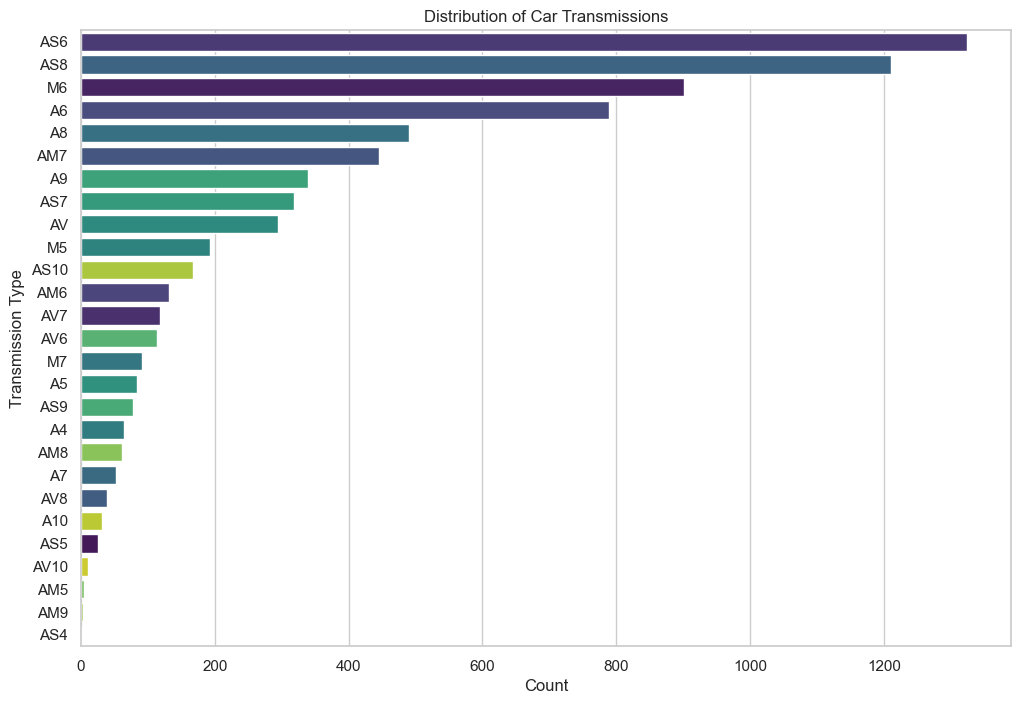

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Transmission', data=df, palette='viridis', hue='Transmission', 
order=df['Transmission'].value_counts().index)
plt.title('Distribution of Car Transmissions')
plt.xlabel('Count')
plt.ylabel('Transmission Type')
plt.show()

# Transmission Type

In [13]:
df['Transmission Type'].value_counts()

Transmission Type
A    6200
M    1185
Name: count, dtype: int64

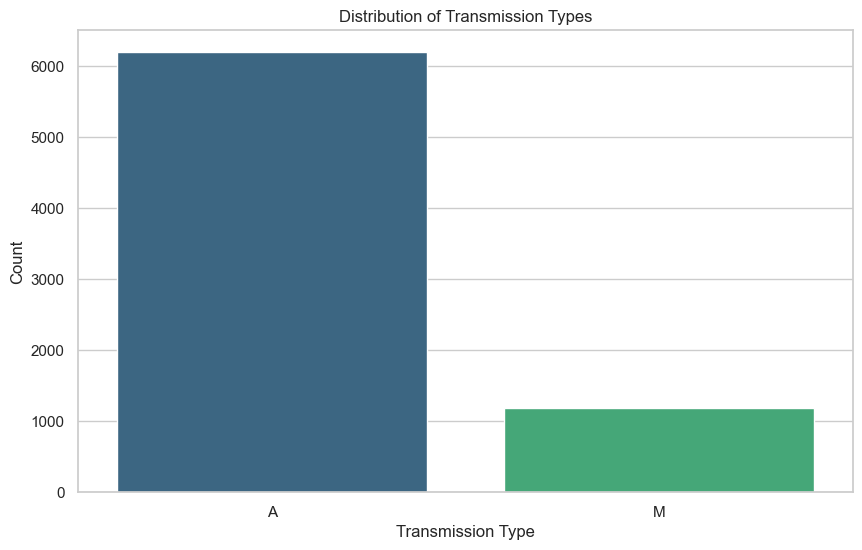

In [14]:
# Count plot for 'Transmission Type'
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.countplot(x='Transmission Type', data=df, hue='Transmission Type', 
palette='viridis', legend=False)
plt.title('Distribution of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

# Vehicle Class

In [15]:
df['Vehicle Class'].value_counts()

Vehicle Class
SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: count, dtype: int64

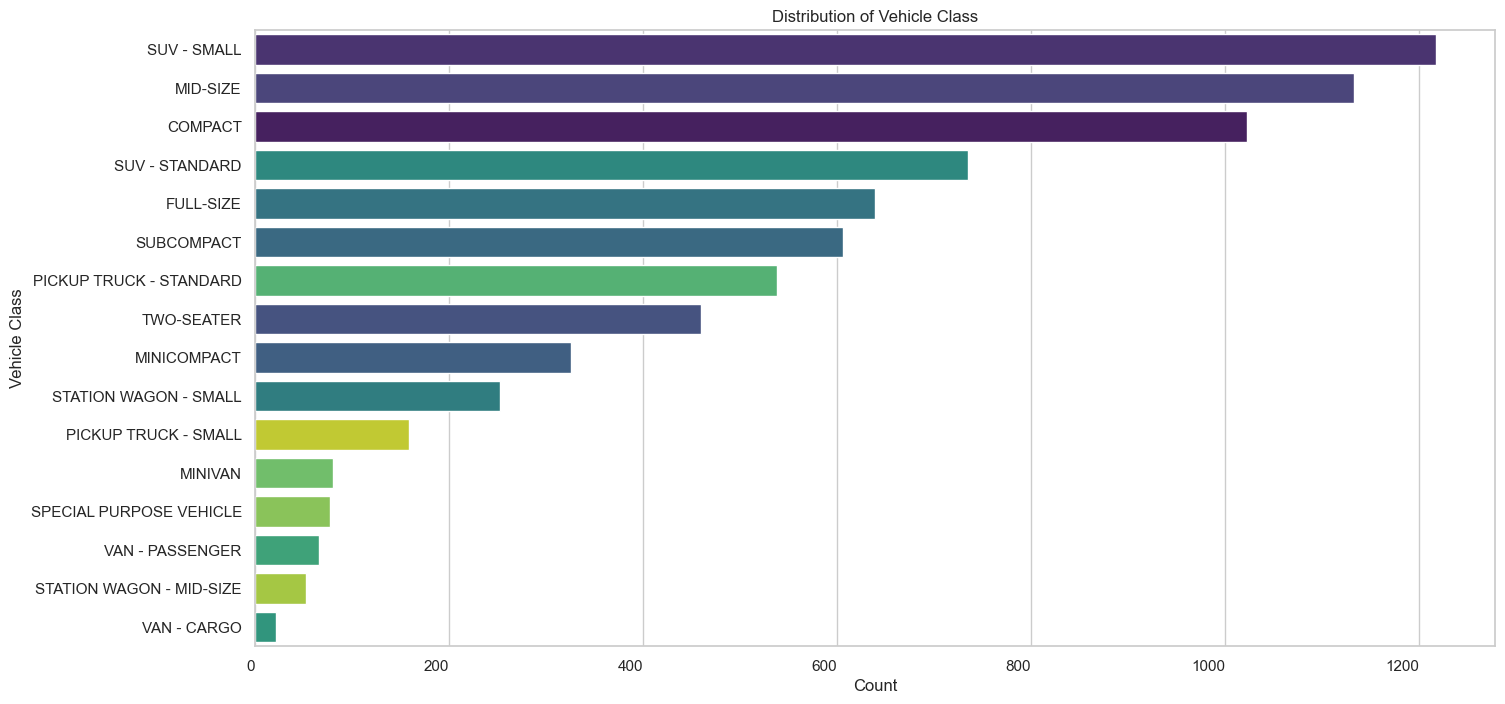

In [16]:
# Bar plot for distribution of Vehicle Class
plt.figure(figsize=(16, 8))
sns.set(style='whitegrid')
sns.countplot(y='Vehicle Class', data=df, palette='viridis', hue='Vehicle Class', 
order=df['Vehicle Class'].value_counts().index, legend=False)
plt.title('Distribution of Vehicle Class')
plt.ylabel('Vehicle Class')
plt.xlabel('Count')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [17]:
df['Fuel Type'].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

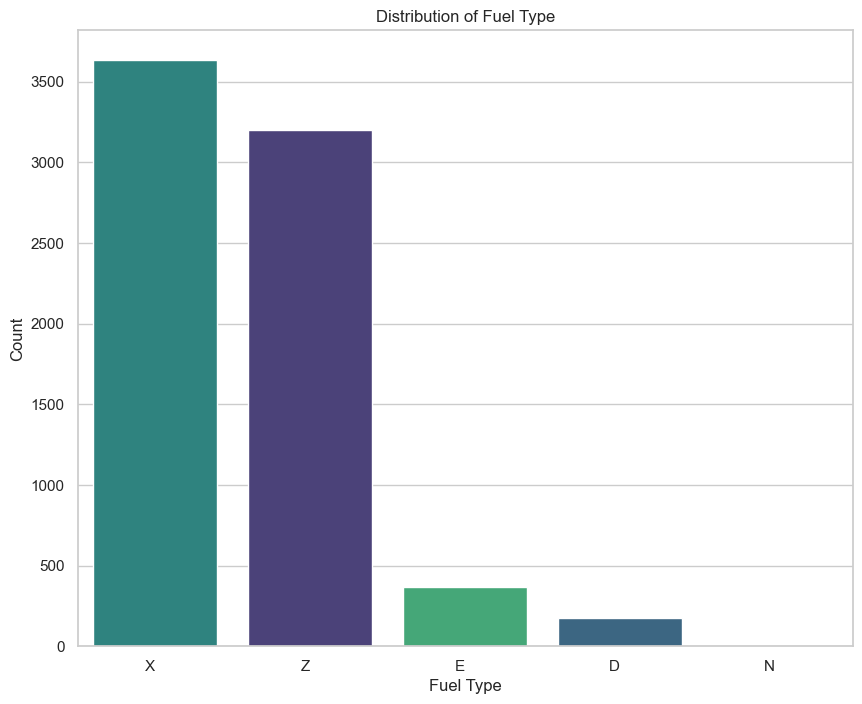

In [18]:
# Bar plot for distribution of fuel types
plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')
sns.countplot(x='Fuel Type', data=df, palette='viridis', hue='Fuel Type', 
order=df['Fuel Type'].value_counts().index, legend=False)
plt.title('Distribution of Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Pengelompokan Konsumsi Bahan Bakar Berdasarkan Gas Buang CO2

In [19]:
x = df.iloc[:, [9, 11]].values      

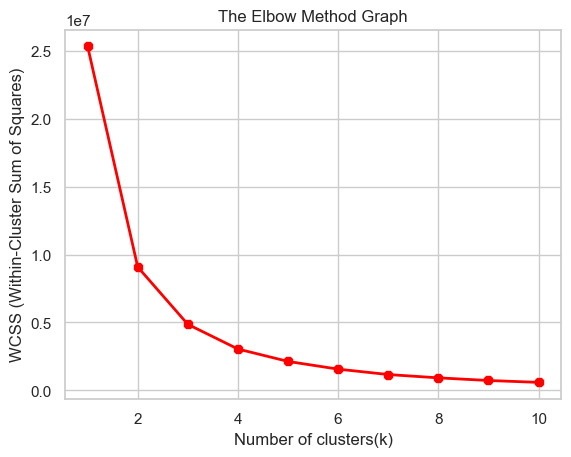

In [20]:
#finding optimal number of clusters using the elbow method  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42, n_init=10)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)

#Show The Graphic
plt.plot(range(1, 11), wcss_list, linewidth=2, color='red', marker='8')
sns.set(style='whitegrid')
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')  
plt.show()  

# Akurasi Data (Silhouette Score)

In [21]:
# training the K-means model on a dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42, n_init=10)  
y_predict = kmeans.fit_predict(x)

# calculating silhouette score
silhouette_avg = silhouette_score(x, y_predict)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5363225074923081


# Cluster

In [22]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42, n_init=10)  
y_predict= kmeans.fit_predict(x)  

In [23]:
# Model with 3 clusters
KmModelFix = KMeans(n_clusters=3, n_init=10)
KmModelFix.fit(x)

# Predicting Labels
hasil_prediksi = KmModelFix.predict(x)
print(hasil_prediksi)

[1 1 1 ... 0 0 0]


In [24]:
df ['Label'] = hasil_prediksi
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission Type,Label
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,A,1
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,M,1
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,A,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,A,0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,A,0


In [25]:
# Print the middle portion of the DataFrame (e.g., rows 10 to 15)
middle_portion = df.iloc[10:16, :]
middle_portion

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission Type,Label
10,ACURA,TSX,COMPACT,2.4,4,M6,Z,11.2,8.1,9.8,29,225,M,1
11,ACURA,TSX,COMPACT,3.5,6,AS5,Z,12.1,8.3,10.4,27,239,A,0
12,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193,A,1
13,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359,A,2
14,ASTON MARTIN,RAPIDE,SUBCOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359,A,2
15,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338,A,2


In [26]:
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission Type,Label
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,A,1
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,A,0
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,A,0
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,A,0
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248,A,0


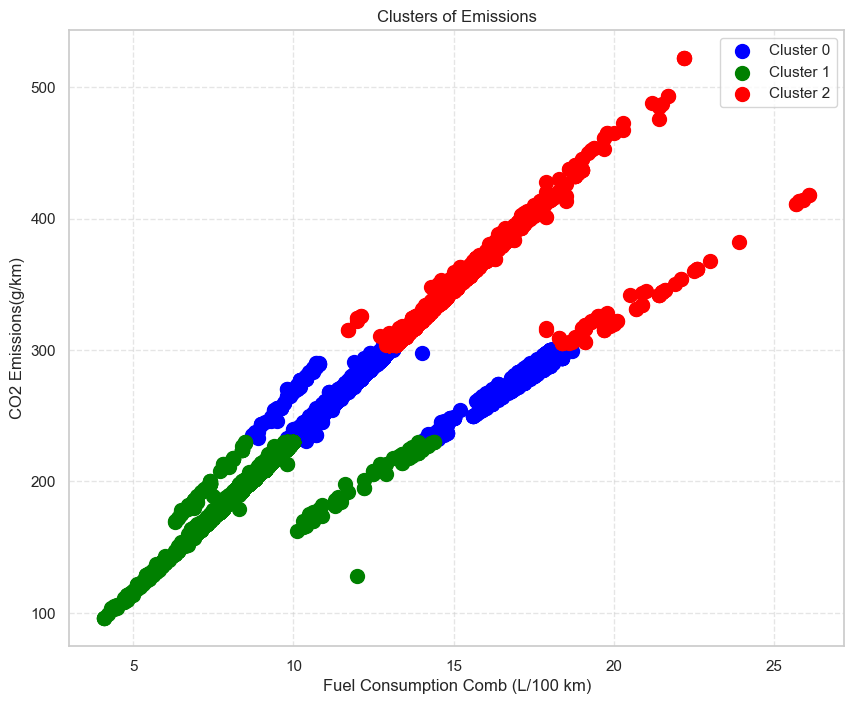

In [27]:
# Assuming df has been updated with the 'Label' column
df_clustered = df[['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)', 'Label']]

# Extracting values for visualization
x = df_clustered.iloc[:, [0, 1]].values
labels = df_clustered['Label'].values

# Visualizing the clusters
plt.figure(figsize=(10, 8))
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], s=100, c='blue', label='Cluster 0')  # for first cluster
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], s=100, c='green', label='Cluster 1')  # for second cluster
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], s=100, c='red', label='Cluster 2')  # for third cluster

# Plotting centroids if needed
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')

plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Clusters of Emissions')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.legend()
plt.show()

# Kesimpulan

In [28]:
df_clustered = df[['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)', 'Label']]

# Display the summary statistics for each cluster
cluster_summary = df_clustered.groupby('Label').describe()
print(cluster_summary)

      Fuel Consumption Comb (L/100 km)                                         \
                                 count       mean       std   min   25%   50%   
Label                                                                           
0                               3099.0  11.670765  1.688612   8.7  10.6  11.3   
1                               2984.0   8.467527  1.253937   4.1   7.8   8.6   
2                               1302.0  15.066129  2.183200  11.7  13.6  14.4   

                  CO2 Emissions(g/km)                                       \
        75%   max               count        mean        std    min    25%   
Label                                                                        
0      12.3  18.7              3099.0  264.493062  20.578846  231.0  247.0   
1       9.3  14.4              2984.0  196.085791  25.171021   96.0  182.0   
2      15.7  26.1              1302.0  342.384025  35.552691  304.0  317.0   

                            
         50%   